<a href="https://colab.research.google.com/github/sankar-6/Brainwave_Matrix_Intern/blob/main/Walmart_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Walmart is famously known for offering consistently low prices and a wide variety of products, making it a popular destination for shoppers seeking value and convenience. They're also known for their extensive global presence, with stores operating in multiple countries. The company's focus on efficient supply chain management and customer-friendly pricing has contributed to their success**

###**Import the required python libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Import the dataset

In [2]:
data=pd.read_csv("/content/Walmart.csv")

In [5]:
data.shape

(10051, 11)

In [4]:
data.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,$74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,$15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,$46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,$58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,$86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48


In [81]:
data.tail(5)

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,total price
9995,9996,WALM056,Rowlett,Fashion accessories,37.0,3.0,03/08/23,10:10:00,Cash,3.0,0.33,111.0
9996,9997,WALM030,Richardson,Home and lifestyle,58.0,2.0,22/02/21,14:20:00,Cash,7.0,0.48,116.0
9997,9998,WALM050,Victoria,Fashion accessories,52.0,3.0,15/06/23,16:00:00,Credit card,4.0,0.48,156.0
9998,9999,WALM032,Tyler,Home and lifestyle,79.0,2.0,25/02/21,12:25:00,Cash,7.0,0.48,158.0
9999,10000,WALM069,Rockwall,Fashion accessories,62.0,3.0,26/09/20,9:48:00,Cash,3.0,0.33,186.0


**Sales of Walmart company in the year 2019 to 2023**

In [6]:
data.columns

Index(['invoice_id', 'Branch', 'City', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin'],
      dtype='object')

###Descriptive Data Analysis

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      10051 non-null  int64  
 1   Branch          10051 non-null  object 
 2   City            10051 non-null  object 
 3   category        10051 non-null  object 
 4   unit_price      10020 non-null  object 
 5   quantity        10020 non-null  float64
 6   date            10051 non-null  object 
 7   time            10051 non-null  object 
 8   payment_method  10051 non-null  object 
 9   rating          10051 non-null  float64
 10  profit_margin   10051 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 863.9+ KB


In [15]:
data.isnull().sum()

,0
invoice_id,0
Branch,0
City,0
category,0
unit_price,31
quantity,31
date,0
time,0
payment_method,0
rating,0


In [16]:
data.dropna(inplace=True)
data.isnull().sum()

,0
invoice_id,0
Branch,0
City,0
category,0
unit_price,0
quantity,0
date,0
time,0
payment_method,0
rating,0


In [13]:
data.duplicated().sum()

np.int64(51)

**Clean the duplicates**

In [14]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

In [19]:
data['unit_price'] = data['unit_price'].str.replace('$', '').astype(float)

data.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48


In [21]:
data['total price'] = data['unit_price'] * data['quantity']
data.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,total price
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48,522.83
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48,76.40
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33,324.31
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33,465.76
4,5,WALM013,Irving,Sports and travel,86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48,604.17


###Cleaned Data

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9969 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      9969 non-null   int64  
 1   Branch          9969 non-null   object 
 2   City            9969 non-null   object 
 3   category        9969 non-null   object 
 4   unit_price      9969 non-null   float64
 5   quantity        9969 non-null   float64
 6   date            9969 non-null   object 
 7   time            9969 non-null   object 
 8   payment_method  9969 non-null   object 
 9   rating          9969 non-null   float64
 10  profit_margin   9969 non-null   float64
 11  total price     9969 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 1.2+ MB


In [82]:
data.describe()

,invoice_id,unit_price,quantity,rating,profit_margin,total price
count,9969.000000,9969.000000,9969.000000,9969.000000,9969.000000,9969.000000
mean,5010.116561,50.622142,2.355602,5.828839,0.393744,121.348819
std,2886.217349,21.203766,1.605455,1.763723,0.090659,112.678040
min,1.000000,10.080000,1.000000,3.000000,0.180000,10.170000
25%,2524.000000,32.000000,1.000000,4.000000,0.330000,54.000000
50%,5016.000000,51.000000,2.000000,6.000000,0.330000,88.000000
75%,7508.000000,69.000000,3.000000,7.000000,0.480000,156.000000
max,10000.000000,99.960000,10.000000,10.000000,0.570000,993.000000


###Exploratory Data analysis

In [24]:
data.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,total price
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48,522.83
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48,76.40
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33,324.31
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33,465.76
4,5,WALM013,Irving,Sports and travel,86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48,604.17


Text(0.5, 1.0, 'Highest payments')

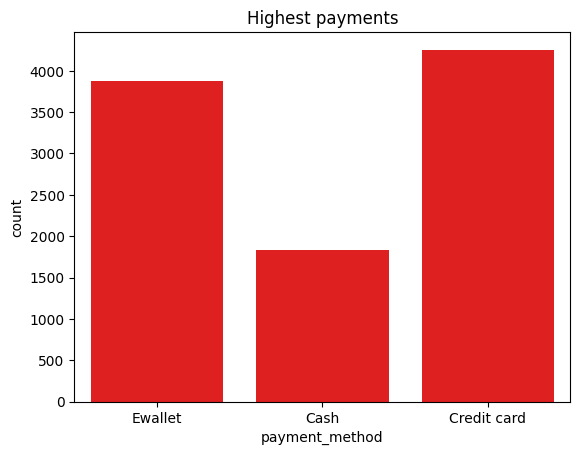

In [64]:
payment_method=data.groupby('payment_method')
sns.countplot(x='payment_method',data=data,color='red')
plt.title('Highest payments')

**Here we analyze that the most payments was done by the Credit card**

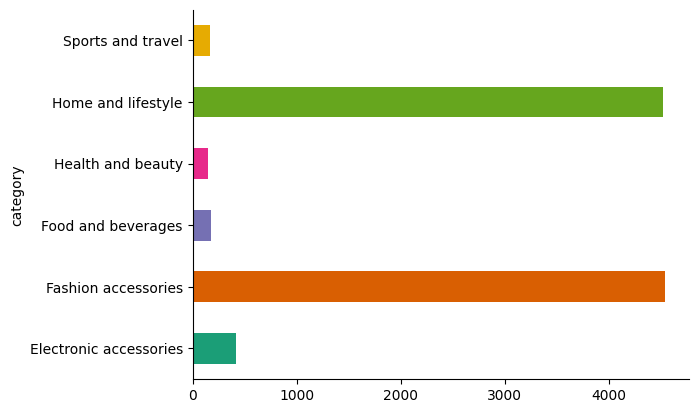

In [70]:
data.groupby('category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**Most of the sales are 'Home and Lifestyle' and 'Fashion accessories'**


Text(0.5, 1.0, 'High Priced goods')

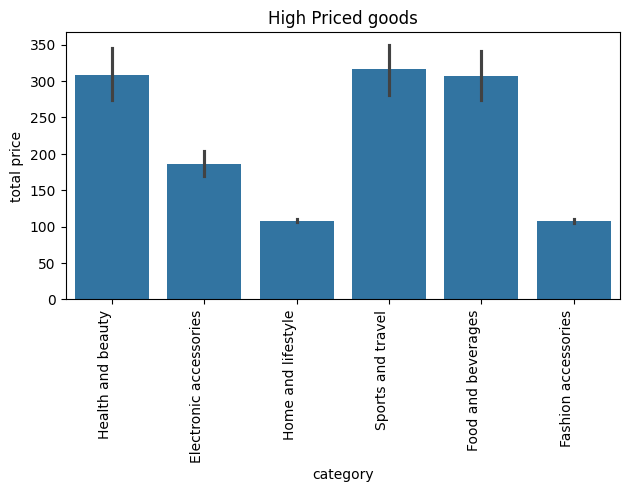

In [56]:
sns.barplot(x='category',y='total price',data=data)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.title('High Priced goods')

**Highest priced goods are 'Health and beauty','Sports and travel' and 'Food and beverages'**

In [57]:
data.head

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,total price
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48,522.83
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48,76.40
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33,324.31
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33,465.76
4,5,WALM013,Irving,Sports and travel,86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48,604.17


Text(0, 0.5, 'Category')

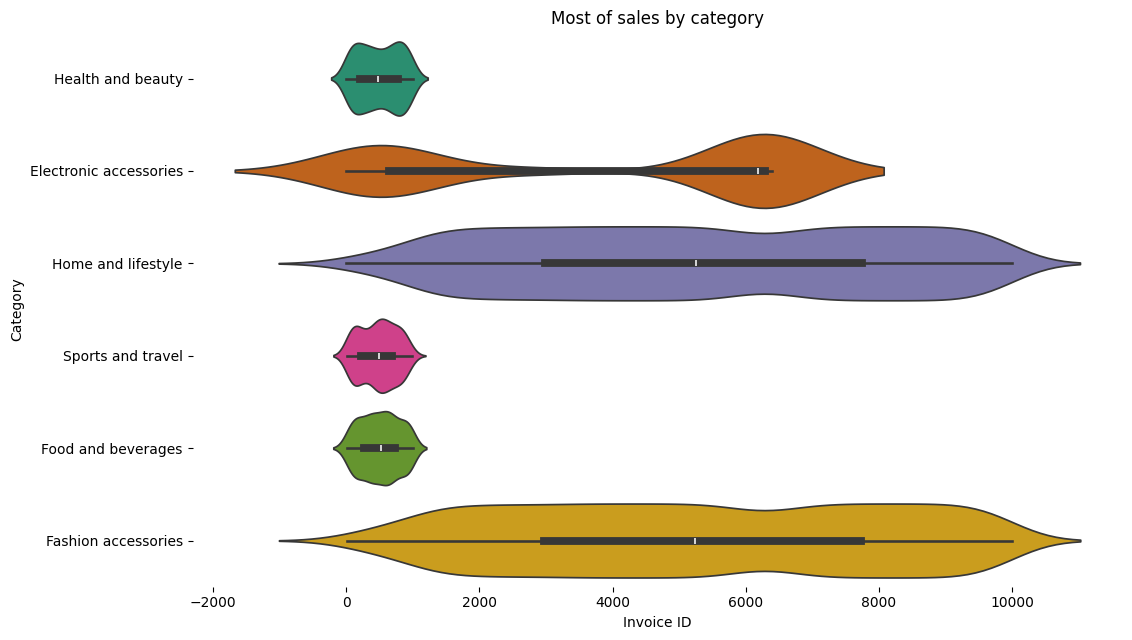

In [80]:
figsize = (12, 1.2 * len(data['category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data=data, x='invoice_id', y='category', hue='category', inner='box', palette='Dark2', legend=False)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title('Most of sales by category')
plt.xlabel('Invoice ID')
plt.ylabel('Category')

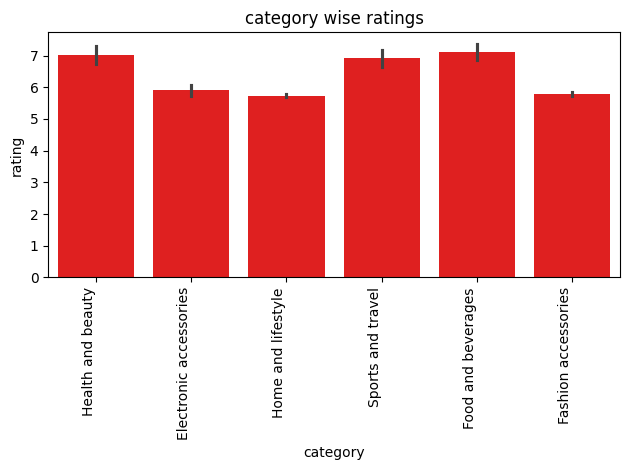

In [74]:
category=data.groupby('category')
sns.barplot(x='category',y='rating',data=data,color='red')
plt.title('category wise ratings')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()